In [30]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve

In [2]:
#  XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR logic output

In [23]:
# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, activation='relu',
                    solver='adam', random_state=42, verbose=True)

In [24]:
# Train the MLP
mlp.fit(X, y)

Iteration 1, loss = 0.75896734
Iteration 2, loss = 0.75843960
Iteration 3, loss = 0.75791450
Iteration 4, loss = 0.75739207
Iteration 5, loss = 0.75687236
Iteration 6, loss = 0.75635540
Iteration 7, loss = 0.75584123
Iteration 8, loss = 0.75532989
Iteration 9, loss = 0.75482141
Iteration 10, loss = 0.75431581
Iteration 11, loss = 0.75381314
Iteration 12, loss = 0.75331343
Iteration 13, loss = 0.75281669
Iteration 14, loss = 0.75232295
Iteration 15, loss = 0.75183224
Iteration 16, loss = 0.75134459
Iteration 17, loss = 0.75086001
Iteration 18, loss = 0.75037851
Iteration 19, loss = 0.74990013
Iteration 20, loss = 0.74942486
Iteration 21, loss = 0.74895274
Iteration 22, loss = 0.74848376
Iteration 23, loss = 0.74801793
Iteration 24, loss = 0.74755527
Iteration 25, loss = 0.74709579
Iteration 26, loss = 0.74663948
Iteration 27, loss = 0.74618635
Iteration 28, loss = 0.74573640
Iteration 29, loss = 0.74528964
Iteration 30, loss = 0.74484605
Iteration 31, loss = 0.74440565
Iteration 32, los

,hidden_layer_sizes,"(2,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [25]:
# Make predictions
predictions = mlp.predict(X)

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y, predictions)
accuracy

0.5

In [28]:
# Generate confusion matrix
cm = confusion_matrix(y, predictions)

In [8]:
# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('MLP Decision Boundary for XOR Problem')
    plt.show()

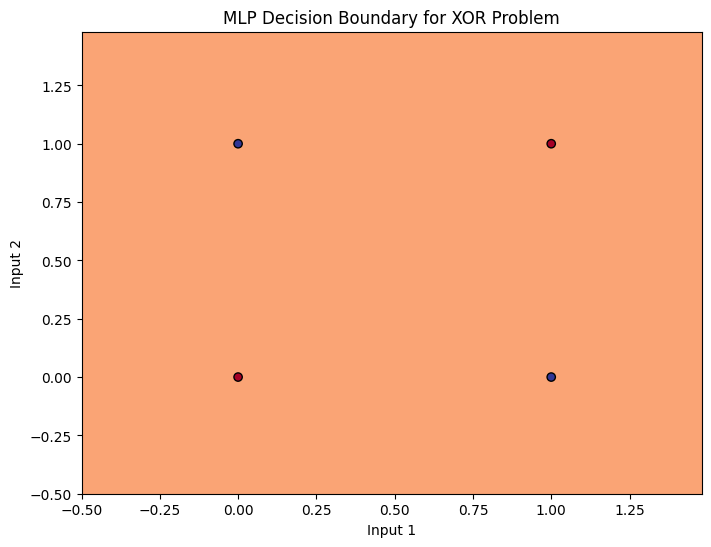

In [9]:
plot_decision_boundary(X, y, mlp)

In [10]:
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for MLP on XOR Problem")
plt.legend(loc="best")
plt.show()

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

In [ ]:
# Print results
print(f"Predictions: {predictions}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
print("Model Parameters:")
print(f"Number of layers: {len(mlp.coefs_)}")
print(f"Number of neurons in each layer: {[len(layer) for layer in mlp.coefs_]}")

Predictions: [1 1 1 1]
Accuracy: 0.5
Confusion Matrix:
[[0 2]
 [0 2]]
Model Parameters:
Number of layers: 2
Number of neurons in each layer: [2, 2]
